In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('portland-oregon-average-monthly-.csv')

In [3]:
df.rename(columns = {'Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114': 'total_number_of_riders'}, inplace = True)

In [4]:
df.head()

,Month,total_number_of_riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [5]:
df.drop([114], inplace = True)

In [6]:
df.tail()

,Month,total_number_of_riders
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [7]:
df['Month'] = pd.to_datetime(df['Month'], format = '%Y-%m')

In [8]:
df['total_number_of_riders'] = df['total_number_of_riders'].apply(int)

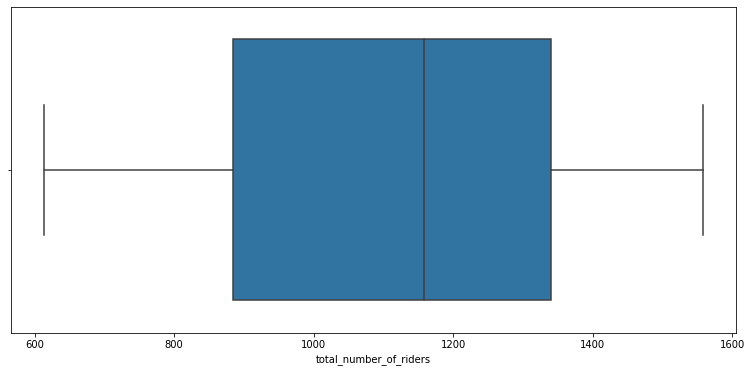

In [9]:
plt.figure(figsize=(13,6))
sns.boxplot(df['total_number_of_riders'])

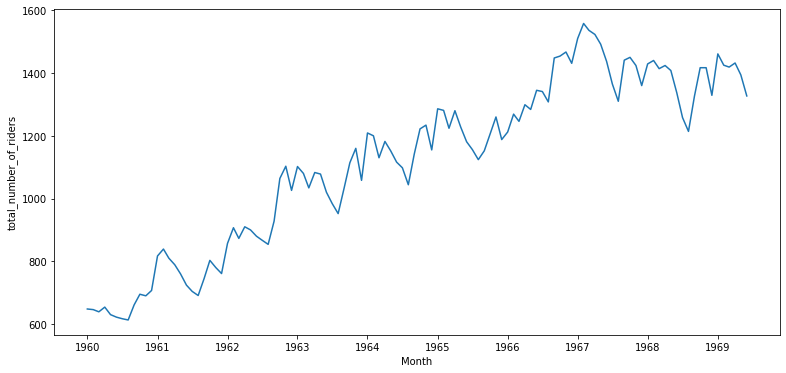

In [10]:
plt.figure(figsize=(13,6))
sns.lineplot(data = df, x = 'Month', y = 'total_number_of_riders')

In [11]:
df.columns

Index(['Month', 'total_number_of_riders'], dtype='object')

In [12]:
df['Month_name'] = df['Month'].dt.month_name()

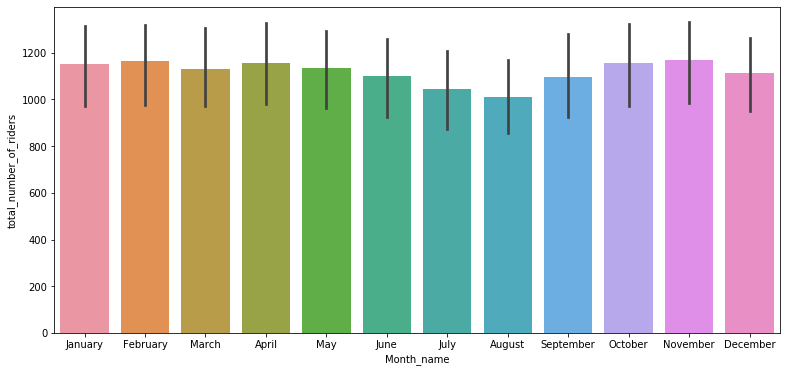

In [13]:
plt.figure(figsize=(13,6))
sns.barplot(x = 'Month_name', y = 'total_number_of_riders', data = df)
plt.show()

Above barplot not representing monthly variation effectively

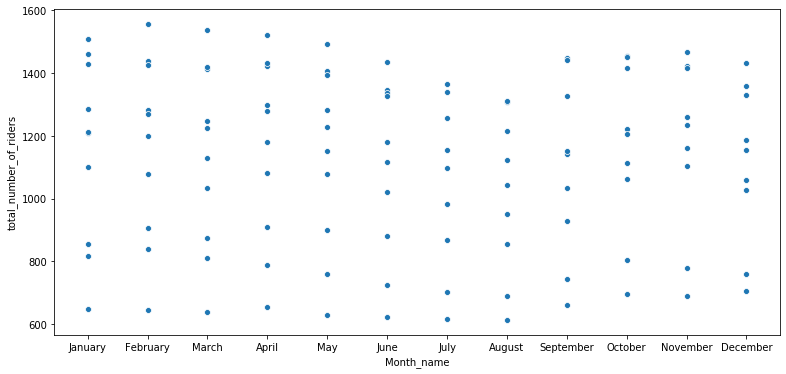

In [14]:
plt.figure(figsize=(13,6))
sns.scatterplot(x = 'Month_name', y = 'total_number_of_riders', data= df)


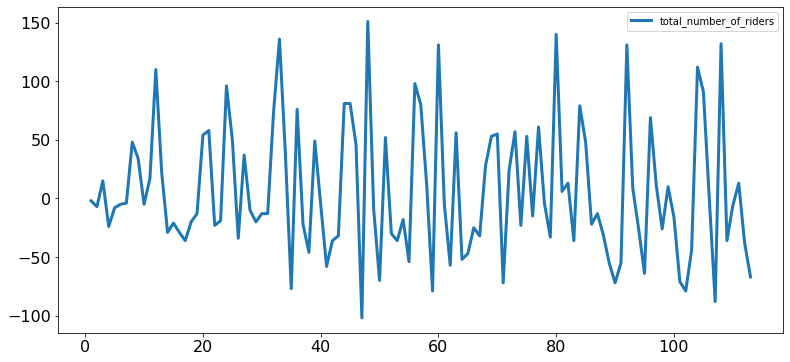

In [15]:
df[['total_number_of_riders']].diff(periods=1).plot(figsize=(13,6), linewidth=3, fontsize=16)
plt.show()

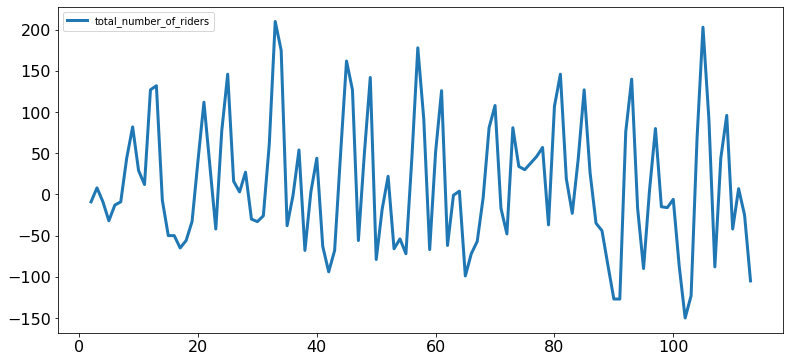

In [16]:

df[['total_number_of_riders']].diff(periods=2).plot(figsize=(13,6), linewidth=3, fontsize=16)
plt.show()

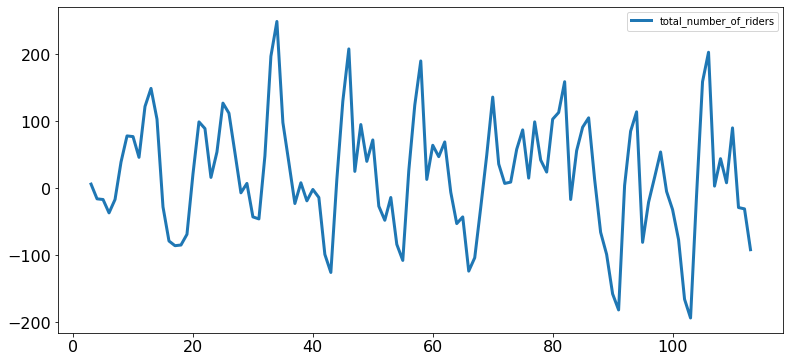

In [17]:
df[['total_number_of_riders']].diff(periods=3).plot(figsize=(13,6), linewidth=3, fontsize=16)
plt.show()

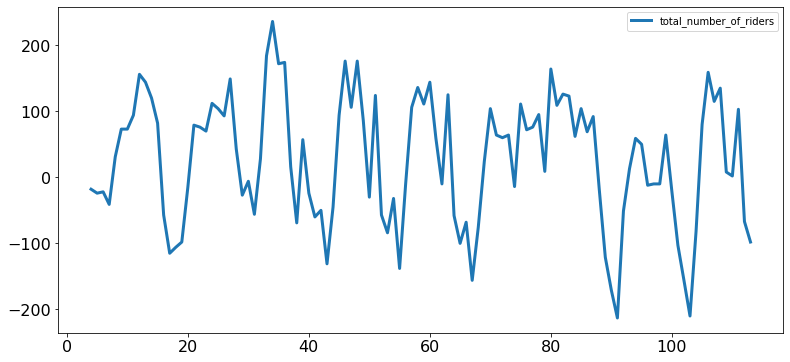

In [18]:
df[['total_number_of_riders']].diff(periods=4).plot(figsize=(13,6), linewidth=3, fontsize=16)
plt.show()

The above graphs are representing difference between average rider of a month and at intervals(1 to 4) before that month.

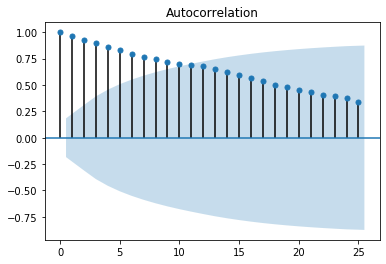

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df[['total_number_of_riders']], lags = 25)
plt.show()

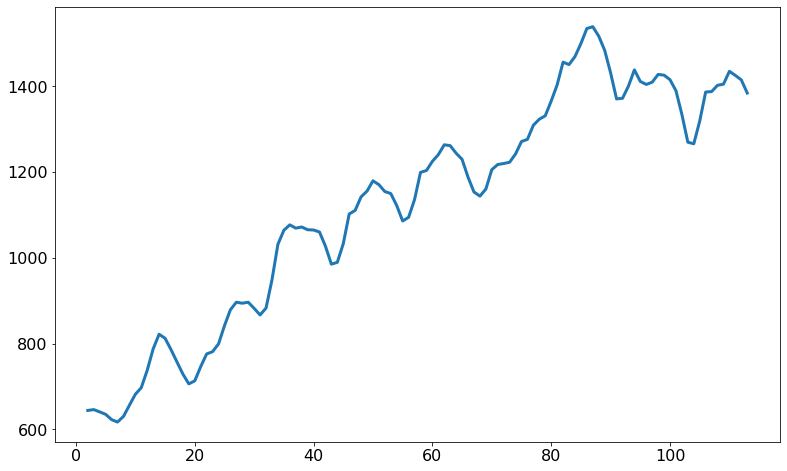

In [20]:
df['total_number_of_riders'].rolling(3).mean().plot(figsize=(13,8), linewidth=3, fontsize=16)
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [22]:
adf_test(df['total_number_of_riders'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [23]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [24]:
kpss_test(df['total_number_of_riders'])

Results of KPSS Test:
Test Statistic            0.868102
p-value                   0.010000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/sociolla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/sociolla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [25]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=356).mean()
    rolstd = timeseries.rolling(window=365).std()

    #Plot rolling statistics:
    # orig = plt.plot(timeseries, color='blue',label='Original')
    # mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    # std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    orig=timeseries.plot(color='blue', label='Original')
    mean = rolmean.plot(color='red', label='Rolling Mean')
    std = rolstd.plot(color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

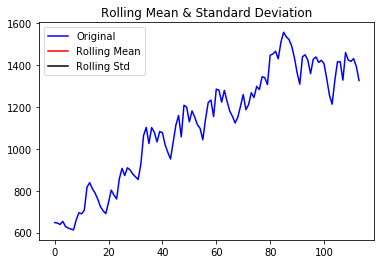

Results of Dickey-Fuller Test:
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [26]:
test_stationarity(df['total_number_of_riders'])

In [27]:
train = df.set_index('Month')[:'1967']['total_number_of_riders']
test = df.set_index('Month')['1968':]['total_number_of_riders']

In [28]:
train.shape

(96,)

In [29]:
test.shape

(18,)

In [30]:
! pip install pmdarima

In [31]:
import pmdarima as pm

In [32]:
model = pm.auto_arima(train, seasonal= False, stationary=False)

/Users/sociolla/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [33]:
fc = model.predict(n_periods = 18, alpha=0.05) 

In [34]:
fc_series = pd.Series(fc, index=test.index)

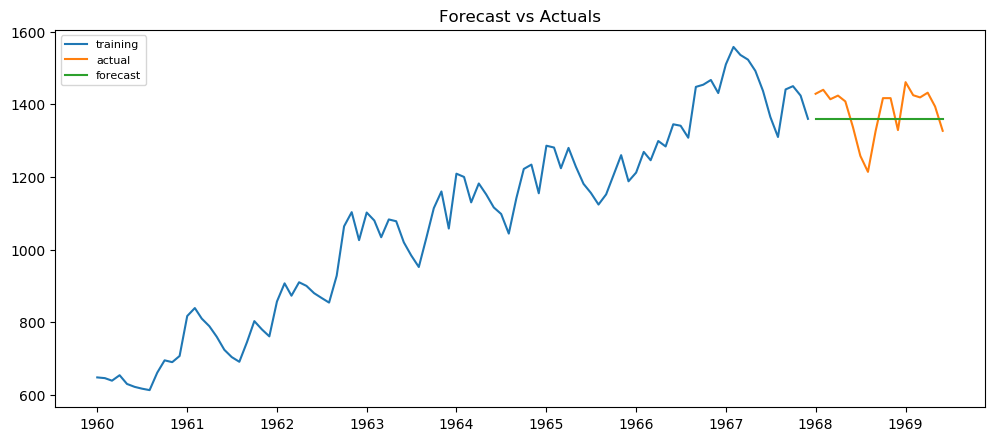

In [35]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()